Feature selection 特征选择

[Feature selection官网](https://scikit-learn.org/stable/modules/feature_selection.html)

[chensyqq大佬录的清爽版解读](https://www.bilibili.com/video/av91746257?from=search&seid=122456323171648715)

The classes in the sklearn.feature_selection module can be used for feature selection/dimensionality reduction on sample sets, either to improve estimators’ accuracy scores or to boost their performance on very high-dimensional datasets.

sklearn.feature_selection 模块中的类可用于样本集的特征选择/降维，以提高估计量的准确性得分或提高其在超高维数据集上的性能。

# Removing features with low variance 

删除方差较小的特征

VarianceThreshold is a simple baseline approach to feature selection

VarianceThreshold是用于特征选择的简单基准

It removes all features whose variance doesn’t meet some threshold

它将删除方差未达到某个阈值的特征

By default, it removes all zero-variance features

默认情况下，它将删除所有零方差特征

i.e. features that have the same value in all samples

比如在所有样本中具有相同值的特征


As an example, suppose that we have a dataset with boolean features

例如，假设我们有一个具有布尔特征的数据集

and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples

我们希望在80％以上的样本中删除所有为1或0（打开或关闭）的特征


Boolean features are Bernoulli random variables, and the variance of such variables is given by

布尔特征是伯努利随机变量，这些变量的方差由下式给出：

$$\mathrm{Var}[X] = p(1 - p)$$

这个地方说的方差，其实是在统计个数，因为布尔值距离计算不支持加减

so we can select using the threshold .8 * (1 - .8):

因此我们可以使用阈值.8 *（1-.8）进行选择：

In [1]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], 
     [0, 1, 0], 
     [1, 0, 0], 
     [0, 1, 1], 
     [0, 1, 0], 
     [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

As expected, VarianceThreshold has removed the first column, which has a probability $p = 5/6 > .8$ of containing a zero.

不出所料，VarianceThreshold已删除第一列，因为第一列的包含零的比例为$p = 5/6 > .8$

# Univariate feature selection¶ 
单变量特征选择

Univariate feature selection works by selecting the best features based on univariate statistical tests

单变量特征选择通过基于单变量统计检验选择最佳特征来工作

It can be seen as a preprocessing step to an estimator. 

可以将其视为估算器的预处理步骤

Scikit-learn exposes feature selection routines as objects that implement the transform method:

Scikit-learn将要素选择例程公开为实现transform方法的对象：

- SelectKBest removes all but the  highest scoring features

  SelectKBest只保留得分最高的特征，其余特征全部删除
  

- SelectPercentile removes all but a user-specified highest scoring percentage of features

  SelectPercentile只留下用户指定的最高得分比例的特征，其余特征全部删除
  

- using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

  对每个功能使用通用的单变量统计检验：误报率SelectFpr，误发现率SelectFdr或家庭式错误SelectFwe
  

- GenericUnivariateSelect allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

  GenericUnivariateSelect允许使用可配置的策略执行单变量特征选择。这允许使用超参数搜索估计器选择最佳的单变量选择策略
  


For instance, we can perform a $\chi^2$ test to the samples to retrieve only the two best features as follows:

例如，我们可以对样本进行测试以仅检索以下两个最佳功能：

In [7]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [9]:
X[10]

array([5.4, 3.7, 1.5, 0.2])

这是连续性的数值

In [10]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

These objects take as input a scoring function that returns univariate scores and p-values (or only scores for SelectKBest and SelectPercentile):

这些对象将一个得分函数作为输入，该函数返回单变量得分和p值（或仅返回SelectKBest和SelectPercentile的得分）：

参数：区分回归问题与分类问题

- For regression: f_regression, mutual_info_regression

- For classification: chi2, f_classif, mutual_info_classif

The methods based on F-test estimate the degree of linear dependency between two random variables. 

这些方法，基于F检验，估计两个随机变量之间的线性相关程度。

On the other hand, mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation.

另一方面，互信息方法可以捕获任何类型的统计依存关系，但是由于是非参数方法，因此需要更多样本才能进行准确估计。

Feature selection with sparse data 稀疏数据的特征选择

If you use sparse data (i.e. data represented as sparse matrices), chi2, mutual_info_regression, mutual_info_classif will deal with the data without making it dense.

如果您使用稀疏数据（即，表示为稀疏矩阵的数据），chi2，互_信息_回归，互_信息_分类 将在不使数据密集的情况下对其进行处理

Warning Beware not to use a regression scoring function with a classification problem, you will get useless results.

警告当心不要对分类问题使用回归评分功能，您将获得无用的结果。

## 例1：连续型数据，分类问题

An example showing univariate feature selection.

Noisy (non informative) features are added to the iris data and univariate feature selection is applied. For each feature, we plot the p-values for the univariate feature selection and the corresponding weights of an SVM. We can see that univariate feature selection selects the informative features and that these have larger SVM weights.

In the total set of features, only the 4 first ones are significant. We can see that they have the highest score with univariate feature selection. The SVM assigns a large weight to one of these features, but also Selects many of the non-informative features. Applying univariate feature selection before the SVM increases the SVM weight attributed to the significant features, and will thus improve classification.

思路：

1. 加载iris数据，150*4，他有4个特征

2. 为了降维，制造20个噪声特征，这些特征与最后的判断不相关

3. 将噪声特征加入数据，数据变为150*24

4. 归一化+f检验看一下特征权重

5. SVC看一下24个特征的权重，并使用24个特征进行分类，看准确率

6. SVC只保留4个特征，再训练看准确率

7. 对比着三种情况下的特征权重（都进行归一处理）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # 最大值最小值归一化
from sklearn.svm import LinearSVC # 支持向量机分类
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif 

# SelectKBest 特征选择方法，“选择K个最好”的特征
# 根据是fvalue，f test

首先导入数据

In [20]:
# The iris dataset
X, y = load_iris(return_X_y=True)

查看X，是连续型的数据

In [21]:
X.shape，X[10]

(150, 4)

查看y，为分类标签

In [23]:
y[0:400]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

查看一共有几类

In [24]:
set(y)

{0, 1, 2}

加入一些噪声数据，之间不相关

In [25]:
# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))
E

array([[0.03745401, 0.09507143, 0.07319939, ..., 0.05247564, 0.0431945 ,
        0.02912291],
       [0.06118529, 0.01394939, 0.02921446, ..., 0.00976721, 0.0684233 ,
        0.04401525],
       [0.01220382, 0.04951769, 0.00343885, ..., 0.01959829, 0.00452273,
        0.03253303],
       ...,
       [0.02653261, 0.06015539, 0.02965599, ..., 0.08616909, 0.02740716,
        0.08070709],
       [0.01952406, 0.0345342 , 0.03356105, ..., 0.0011418 , 0.07036998,
        0.09702571],
       [0.04376613, 0.02349734, 0.0704871 , ..., 0.03097879, 0.02900455,
        0.0871414 ]])

In [26]:
E.shape

(150, 20)

将原来的四个特征与生成的20个噪声特征拼接

In [27]:
# Add the noisy data to the informative features
X = np.hstack((X, E)) # 横向拼接列表
X.shape

(150, 24)

In [28]:
# Split dataset to select feature and evaluate the classifier
# 分割数据集以选择特征并评估分类器。。你就说拆分训练接与测试集不就完了
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
# 没有设置分割比例，默认0.75:0.25
# stratify分成抽样，这里设置按照y的类别分层抽样
# random_state=0随机数起点

In [29]:
plt.figure(1) # 使用plt.figure定义一个图像窗口
plt.clf() # # Clear figure清除所有轴，但是窗口打开，这样它可以被重复使用

<Figure size 432x288 with 0 Axes>

为啥写个1？？

chensy大佬指点：shift+tab

就是这个plt.figure，实在创建图像窗口，如果没有编号，他每次都要新创建一个

如果给了一个编号，num，数字形式，这个窗口可以被重复调用

如果写成了string，这个就设置为window 的 title

这里生成属性的索引

In [30]:
X_indices = np.arange(X.shape[-1]) # 这个实际上是取X最后一个维度的长度，也就是属性的长度
X_indices

# 他想用这个做X轴的坐标

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

使用Univariate feature selection

In [33]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4) # k=最后留几个特征 # 使用的标准是f值检验
selector.fit(X_train, y_train) # 把训练集数据fit进来

SelectKBest(k=4, score_func=<function f_classif at 0x00000185FECAB268>)

In [35]:
selector.pvalues_

array([1.30445334e-24, 4.69398374e-13, 7.86826504e-65, 6.71208699e-65,
       9.19263331e-02, 7.68247566e-01, 6.97135407e-03, 8.71072262e-01,
       2.89870410e-01, 5.17260313e-01, 6.93915953e-01, 6.38021592e-01,
       5.40267165e-01, 3.89960477e-01, 6.61741719e-01, 4.45807702e-01,
       8.70827786e-01, 2.77518368e-01, 7.02334600e-01, 9.10686642e-01,
       8.49305964e-01, 3.24574351e-01, 8.42484503e-01, 2.86600077e-02])

In [37]:
scores = -np.log10(selector.pvalues_) # 这里面有意pvalues
scores

array([2.38845715e+01, 1.23284584e+01, 6.41041210e+01, 6.41731424e+01,
       1.03656006e+00, 1.14498807e-01, 2.15668286e+00, 5.99458155e-02,
       5.37796116e-01, 2.86290842e-01, 1.58693128e-01, 1.95164624e-01,
       2.67391426e-01, 4.08979407e-01, 1.79311485e-01, 3.50852433e-01,
       6.00677223e-02, 5.56708267e-01, 1.53455936e-01, 4.06310338e-02,
       7.09358263e-02, 4.88685802e-01, 7.44380790e-02, 1.54272370e+00])

In [ ]:
scores /= scores.max() # pvalues除以最大值，进行归一化

<BarContainer object of 24 artists>

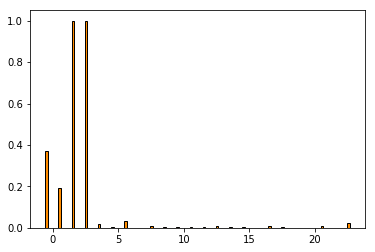

In [39]:
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

这个-.45，宽度为.2是为了在同一个图中画出三个bar，-.45, -.25, -.05,

-0.45-0.15

0.55-2.15

2.55-3.15

太心机了

从这张图中可以看出原始数据中的四个特征是显著的，我们后加入的四个噪声特征显著性接近0

Compare to the weights of an SVM

上面使用的是f检验为标准，下面我们使用SVM的特征重要性来做

In [40]:
clf = make_pipeline(MinMaxScaler(), LinearSVC()) 
# 归一化，（X-min）/（max-min）
# Linear Support Vector Classification.

In [41]:
# fit一下
clf.fit(X_train, y_train)
# 打印出score，三位浮点
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

Classification accuracy without selecting features: 0.789


这里就是没有进行特征选择得到的准确率

In [60]:
# 这里把特征的权重提取出来
svm_weights = np.abs(clf[-1].coef_).sum(axis=0)

这步是干了个啥

In [58]:
clf, clf[0], clf[1]

(Pipeline(memory=None,
          steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                 ('linearsvc',
                  LinearSVC(C=1.0, class_weight=None, dual=True,
                            fit_intercept=True, intercept_scaling=1,
                            loss='squared_hinge', max_iter=1000,
                            multi_class='ovr', penalty='l2', random_state=None,
                            tol=0.0001, verbose=0))],
          verbose=False),
 MinMaxScaler(copy=True, feature_range=(0, 1)),
 LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
           verbose=0))

clf是个pipeline，clf[0]是这个 MinMaxScaler，clf[1]是这个LinearSVC

所以clf[-1]是倒数第一个，也就是LinearSVC

In [44]:
clf[-1]

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [43]:
clf[-1].coef_.shape

(3, 24)

[sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

coef_array, shape = [1, n_features] if n_classes == 2 else [n_classes, n_features]

Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.


线性核的时候，赋予特征的权重

数组，维度：

当二分类，1*特整数

当n分类，n*特征数

所以因为我们这里是三分类，24个特征，所以是3*24

In [61]:
svm_weights.sum() # 他这个权重和不是1

25.834829560017106

In [62]:
# 权重除以权重之和，使得之后的权重之和为一
svm_weights /= svm_weights.sum()

<BarContainer object of 24 artists>

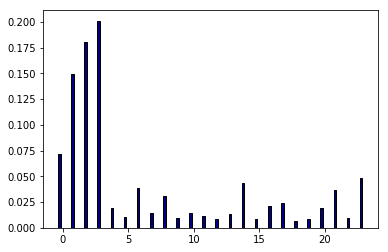

In [63]:
plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

这个里面可以看到SVC给的权重，前四个比较高，后面的小

给这个权重设定一个阈值，就能选出特征

下面我们加入SelectKBest，选出保留四个特征，再做一次支持向量机

In [64]:
clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

Classification accuracy after univariate feature selection: 0.868


可以看到模型的精度提高了10%

<BarContainer object of 4 artists>

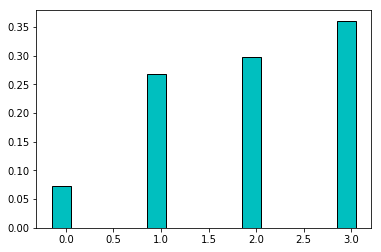

In [65]:
# 输出四个特征的权重
svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()
plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')

最后，前面所有的代码一起运行，就得到官网这个图

Classification accuracy without selecting features: 0.789
Classification accuracy after univariate feature selection: 0.868


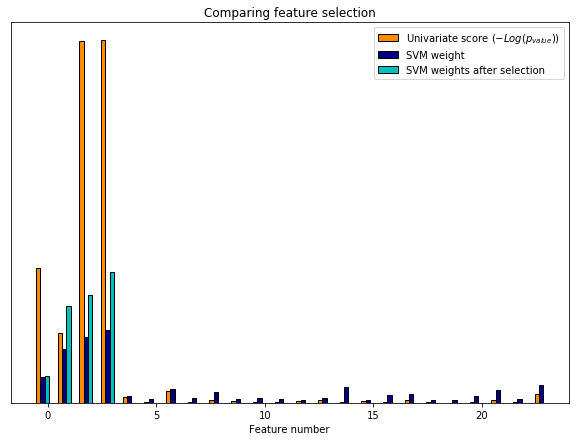

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# #############################################################################
# Import some data to play with

# The iris dataset
X, y = load_iris(return_X_y=True)

# Some noisy data not correlated
E = np.random.RandomState(42).uniform(0, 0.1, size=(X.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((X, E))

# Split dataset to select feature and evaluate the classifier
X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, random_state=0
)

plt.figure(1, figsize=(10, 7))
plt.clf()

X_indices = np.arange(X.shape[-1])

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function to select the four
# most significant features
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

# #############################################################################
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight',
        color='navy', edgecolor='black')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=4), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='c',
        edgecolor='black')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

## 例2

This example illustrates the differences between univariate F-test statistics and mutual information.

We consider 3 features x_1, x_2, x_3 distributed uniformly over [0, 1], the target depends on them as follows:

y = x_1 + sin(6 * pi * x_2) + 0.1 * N(0, 1), that is the third features is completely irrelevant.

The code below plots the dependency of y against individual x_i and normalized values of univariate F-tests statistics and mutual information.

As F-test captures only linear dependency, it rates x_1 as the most discriminative feature. On the other hand, mutual information can capture any kind of dependency between variables and it rates x_2 as the most discriminative feature, which probably agrees better with our intuitive perception for this example. Both methods correctly marks x_3 as irrelevant.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

In [73]:
np.random.seed(0)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

In [74]:
X.shape, X[0], y.shape, y[0]

((1000, 3),
 array([0.5488135 , 0.71518937, 0.60276338]),
 (1000,),
 1.5211975087574658)

In [76]:
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)
f_test

array([1.        , 0.28024353, 0.00252204])

[f_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)

((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

所以是每个特征到均值的距离有几个方差

<div><img src="./img/1101.png", width=700>

<div><img src="./img/1102.jpg", width=500>

In [77]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)
mi

array([0.36448455, 1.        , 0.        ])

[mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

Estimate mutual information for a continuous target variable.

Mutual information (MI) [1] between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

discrete_features{‘auto’, bool, array_like}, default ‘auto’
If bool, then determines whether to consider all features discrete or continuous. If array, then it should be either a boolean mask with shape (n_features,) or array with indices of discrete features. If ‘auto’, it is assigned to False for dense X and to True for sparse X.

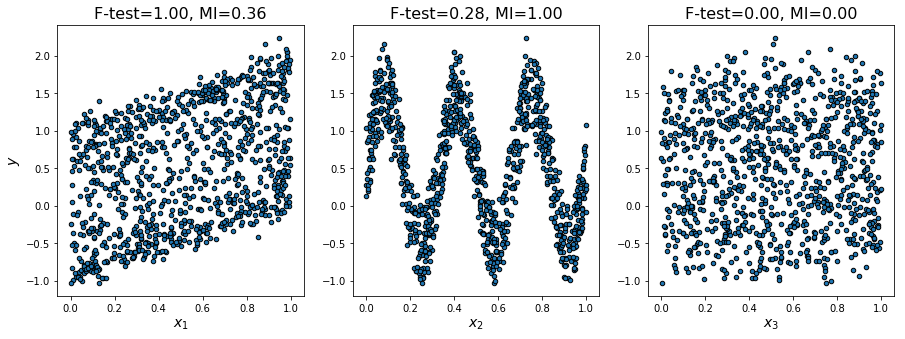

In [78]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor='black', s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

# Recursive feature elimination 递归特征消除

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.

给定一个将权重分配给特征（例如线性模型的系数）的外部估计器，递归特征消除（RFE）将通过递归考虑越来越少的特征集来选择特征。首先，对估计器进行初始特征集训练，并通过coef _属性或feature_ importances_属性获得每个特征的重要性。然后，从当前的一组特征中删除最不重要的特征，然后对该过程进行递归重复，直到最终达到所需的特征数量。

RFECV在交叉验证循环中执行RFE，以找到最佳数量的特征。

## 例1：Recursive feature elimination

A recursive feature elimination example showing the relevance of pixels in a digit classification task.

一个递归特征消除示例，显示了数字分类任务中像素的相关性。

In [79]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

加载数据，这个数据是1797张，8*8的图片

In [82]:
# Load the digits dataset
digits = load_digits()
digits.images.shape

(1797, 8, 8)

将图片展开为一维，作为X

In [80]:
X = digits.images.reshape((len(digits.images), -1))
X.shape

(1797, 64)

In [81]:
y = digits.target
y.shape

(1797,)

查看y中有多少个类型

In [83]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [84]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape) # 得到的重要性排名重新并未8*8

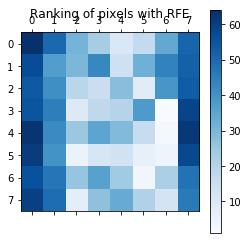

In [85]:
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues) # 画出来
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

## 例2：Recursive feature elimination with cross-validation

A recursive feature elimination example with automatic tuning of the number of features selected with cross-validation.

一个递归特征消除示例，该示例通过交叉验证自动调整所选特征的数量。

In [87]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [88]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

X.shape, y.shape

((1000, 25), (1000,))

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 3


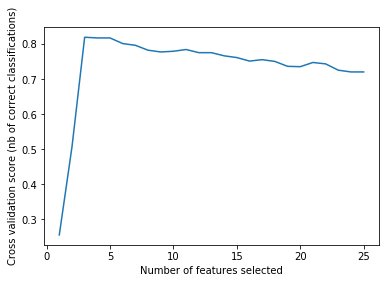

In [24]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_) # x:选用特征的数量,y:交叉验证的精确度
plt.show()

# Feature selection using SelectFromModel

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

For examples on how it is to be used refer to the sections below.

SelectFromModel是一个元转换器，可以与拟合后具有coef _或feature_ importances _属性的任何估计量一起使用。如果相应的coef_或feature _重要性_值低于提供的阈值参数，则认为这些要素不重要并已删除。除了通过数字指定阈值之外，还有一些内置的启发式方法，可使用字符串参数查找阈值。可用的试探法是“平均值”，“中位数”和诸如“ 0.1 * mean”之类的浮点数的倍数。

有关如何使用它的示例，请参阅以下各节。

## 例1

Selecting the two most important features from the Boston dataset without knowing the threshold beforehand.

在事先不知道的情况下，从波士顿数据集中选出两个最重要的特征

In [89]:
# Author: Manoj Kumar <mks542@nyu.edu>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [90]:
# Load the boston dataset.
X, y = load_boston(return_X_y=True)

X.shape, X[0], y.shape, y[0]

((506, 13),
 array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]),
 (506,),
 24.0)

In [91]:
import pandas as pd

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [92]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

In [93]:
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001,
                                  fit_intercept=True, max_iter=1000,
                                  n_alphas=100, n_jobs=None, normalize=False,
                                  positive=False, precompute='auto',
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.25)

In [94]:
n_features = sfm.transform(X).shape[1]
n_features

5

In [95]:
# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

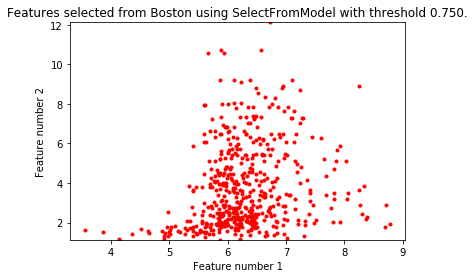

In [96]:
# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

## L1-based feature selection

Linear models penalized with the L1 norm have sparse solutions: many of their estimated coefficients are zero. When the goal is to reduce the dimensionality of the data to use with another classifier, they can be used along with feature_selection.SelectFromModel to select the non-zero coefficients. In particular, sparse estimators useful for this purpose are the linear_model.Lasso for regression, and of linear_model.LogisticRegression and svm.LinearSVC for classification:

受L1范数惩罚的线性模型的稀疏解决方案：许多估计系数为零。当目标是减少要与另一个分类器一起使用的数据的维数时，可以将它们与feature <_> selection.SelectFromModel一起使用以选择非零系数。特别地，用于此目的的稀疏估计量是用于回归的linear__model.Lasso和用于分类的linear_model.LogisticRegression和svm.LinearSVC：

In [26]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [27]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

With SVMs and logistic-regression, the parameter C controls the sparsity: the smaller C the fewer features selected. With Lasso, the higher the alpha parameter, the fewer features selected.

对于SVM和logistic回归，参数C控制稀疏度：C越小，选择的特征就越少。使用套索，alpha参数越高，选择的特征就越少。

### Classification of text documents using sparse features

This is an example showing how scikit-learn can be used to classify documents by topics using a bag-of-words approach. This example uses a scipy.sparse matrix to store the features and demonstrates various classifiers that can efficiently handle sparse matrices.

The dataset used in this example is the 20 newsgroups dataset. It will be automatically downloaded, then cached.

#### Display progress logs on stdout

In [100]:
import logging # logging是Python的日志模块，用来显示/存储日志信息
import numpy as np
from optparse import OptionParser # 用于生成帮助文档
import sys
from time import time
import matplotlib.pyplot as plt

In [101]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

In [116]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [118]:
op = OptionParser()
op.add_option("--report",
              action="store_true", dest="print_report",
              help="Print a detailed classification report.")
op.add_option("--chi2_select",
              action="store", type="int", dest="select_chi2",
              help="Select some number of features using a chi-squared test")
op.add_option("--confusion_matrix",
              action="store_true", dest="print_cm",
              help="Print the confusion matrix.")
op.add_option("--top10",
              action="store_true", dest="print_top10",
              help="Print ten most discriminative terms per class"
                   " for every classifier.")
op.add_option("--all_categories",
              action="store_true", dest="all_categories",
              help="Whether to use all categories or not.")
op.add_option("--use_hashing",
              action="store_true",
              help="Use a hashing vectorizer.")
op.add_option("--n_features",
              action="store", type=int, default=2 ** 16,
              help="n_features when using the hashing vectorizer.")
op.add_option("--filtered",
              action="store_true",
              help="Remove newsgroup information that is easily overfit: "
                   "headers, signatures, and quoting.")

<Option at 0x18584d18048: --filtered>

In [ ]:
def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')

In [102]:
# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --report              Print a detailed classification report.
  --chi2_select=SELECT_CHI2
                        Select some number of features using a chi-squared
                        test
  --confusion_matrix    Print the confusion matrix.
  --top10               Print ten most discriminative terms per class for
                        every classifier.
  --all_categories      Whether to use all categories or not.
  --use_hashing         Use a hashing vectorizer.
  --n_features=N_FEATURES
                        n_features when using the hashing vectorizer.
  --filtered            Remove newsgroup information that is easily overfit:
                        headers, signatures, and quoting.



#### Load data from the training set

Let’s load data from the newsgroups dataset which comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation).

In [104]:
# 这个地方设置后面要取出几个主题的文章
if opts.all_categories:
    categories = None
else:
    categories = [
        'alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space',
    ]

if opts.filtered:
    remove = ('headers', 'footers', 'quotes')
else:
    remove = ()

In [105]:
print("Loading 20 newsgroups dataset for categories:")
print(categories if categories else "all")

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']


加载数据

In [106]:
data_train = fetch_20newsgroups(subset='train', categories=categories,
                                shuffle=True, random_state=42,
                                remove=remove)

data_test = fetch_20newsgroups(subset='test', categories=categories,
                               shuffle=True, random_state=42,
                               remove=remove)
print('data loaded')

2020-02-26 16:59:54,390 INFO Downloading 20news dataset. This may take a few minutes.
2020-02-26 16:59:54,392 INFO Downloading dataset from https://ndownloader.figshare.com/files/5975967 (14 MB)


data loaded


In [137]:
data_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [136]:
print(data_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [138]:
len(data_train['data']), len(data_train['filenames']), len(data_train['target'])

(2034, 2034, 2034)

看一下y，即我们取的文章是哪几个话题

In [107]:
# order of labels in `target_names` can be different from `categories`
target_names = data_train.target_names
target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

定义获取文档大小函数

In [109]:
def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

获取训练集与测试集文档的大小

In [111]:
data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

data_train_size_mb, data_test_size_mb

(3.979536, 2.86749)

将数据信息打印出来

In [113]:
print("%d documents - %0.3fMB (training set)" % (
    len(data_train.data), data_train_size_mb))
print("%d documents - %0.3fMB (test set)" % (
    len(data_test.data), data_test_size_mb))
print("%d categories" % len(target_names))

2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories


训练集与测试集的y

In [114]:
# split a training set and a test set
y_train, y_test = data_train.target, data_test.target

使用稀疏向量机从训练数据中提取特征

In [115]:
print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(stop_words='english', alternate_sign=False,
                                   n_features=opts.n_features)
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

Extracting features from the training data using a sparse vectorizer
done in 0.572470s at 6.952MB/s
n_samples: 2034, n_features: 33809



In [139]:
print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

Extracting features from the test data using the same vectorizer
done in 0.374168s at 7.664MB/s
n_samples: 1353, n_features: 33809



In [140]:
# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names()

In [141]:
if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" %
          opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names:
        # keep selected feature names
        feature_names = [feature_names[i] for i
                         in ch2.get_support(indices=True)]
    print("done in %fs" % (time() - t0))
    print()

In [142]:
if feature_names:
    feature_names = np.asarray(feature_names)

In [143]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

#### Benchmark classifiers

We train and test the datasets with 15 different classification models and get performance results for each model.

In [ ]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred,
                                            target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
        (Perceptron(max_iter=50), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50),
         "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                       tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                           penalty=penalty)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,
                                       penalty="elasticnet")))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,
                                                  tol=1e-3))),
  ('classification', LinearSVC(penalty="l2"))])))

#### Add plots

The bar plot indicates the accuracy, training time (normalized) and test time (normalized) of each classifier.

In [ ]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

L1-recovery and compressive sensing

For a good choice of alpha, the Lasso can fully recover the exact set of non-zero variables using only few observations, provided certain specific conditions are met. In particular, the number of samples should be “sufficiently large”, or L1 models will perform at random, where “sufficiently large” depends on the number of non-zero coefficients, the logarithm of the number of features, the amount of noise, the smallest absolute value of non-zero coefficients, and the structure of the design matrix X. In addition, the design matrix must display certain specific properties, such as not being too correlated.

There is no general rule to select an alpha parameter for recovery of non-zero coefficients. It can by set by cross-validation (LassoCV or LassoLarsCV), though this may lead to under-penalized models: including a small number of non-relevant variables is not detrimental to prediction score. BIC (LassoLarsIC) tends, on the opposite, to set high values of alpha.

Reference Richard G. Baraniuk “Compressive Sensing”, IEEE Signal Processing Magazine [120] July 2007 http://users.isr.ist.utl.pt/~aguiar/CS_notes.pdf

###  Tree-based feature selection

Tree-based estimators (see the sklearn.tree module and forest of trees in the sklearn.ensemble module) can be used to compute feature importances, which in turn can be used to discard irrelevant features (when coupled with the sklearn.feature_selection.SelectFromModel meta-transformer):

In [144]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [145]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

array([0.09559158, 0.05474131, 0.41084847, 0.43881865])

In [146]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape               

(150, 2)

#### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

As expected, the plot suggests that 3 features are informative, while the remaining are not.

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


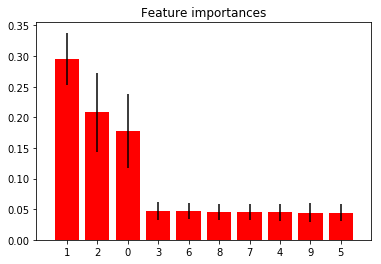

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Pixel importances with a parallel forest of trees

This example shows the use of forests of trees to evaluate the importance of the pixels in an image classification task (faces). The hotter the pixel, the more important.

The code below also illustrates how the construction and the computation of the predictions can be parallelized within multiple jobs.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Huawei\scikit_learn_data
Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 1.216s


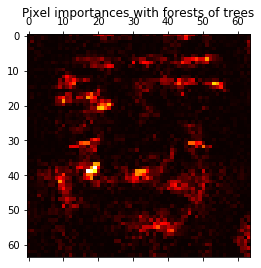

In [31]:
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

# Number of cores to use to perform parallel fitting of the forest model
n_jobs = 1

# Load the faces dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

mask = y < 5  # Limit to 5 classes
X = X[mask]
y = y[mask]

# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.3fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

# Feature selection as part of a pipeline

Feature selection is usually used as a pre-processing step before doing the actual learning. The recommended way to do this in scikit-learn is to use a sklearn.pipeline.Pipeline:

In [33]:
# clf = Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
#   ('classification', RandomForestClassifier())
# ])
# clf.fit(X, y)

In this snippet we make use of a sklearn.svm.LinearSVC coupled with sklearn.feature_selection.SelectFromModel to evaluate feature importances and select the most relevant features. Then, a sklearn.ensemble.RandomForestClassifier is trained on the transformed output, i.e. using only relevant features. You can perform similar operations with the other feature selection methods and also classifiers that provide a way to evaluate feature importances of course. See the sklearn.pipeline.Pipeline examples for more details.